In [96]:
import numpy as np
import scipy.optimize as scipy
import matplotlib.pyplot as plt

In [97]:
def f(x):
  return x**2 - 2

def df(x):
  return 2*x

def ddf(x):
  return 2

In [98]:
a = 0
b = 2
x0 = 4

### Root-Finding Algorithms

In [99]:
root, bisectinfo = scipy.bisect(f, a, b, full_output=True)
# print(root)
# print(bisectinfo)

In [100]:
root, brentqinfo = scipy.brentq(f, a, b, full_output=True)
# print(root)
# print(brentqinfo)

In [101]:
root, toms748info = scipy.toms748(f, a, b, full_output=True)
# print(root)
# print(toms748info)

In [102]:
root, newtoninfo = scipy.newton(f, x0, fprime=df, full_output=True)
# print(root)
# print(newtoninfo)

In [103]:
root, secantinfo = scipy.newton(f, x0, full_output=True)
# print(root)
# print(secantinfo)

In [104]:
root, halleyinfo = scipy.newton(f, x0, fprime=df, fprime2=ddf, full_output=True)
# print(root)
# print(halleyinfo)

### Plots

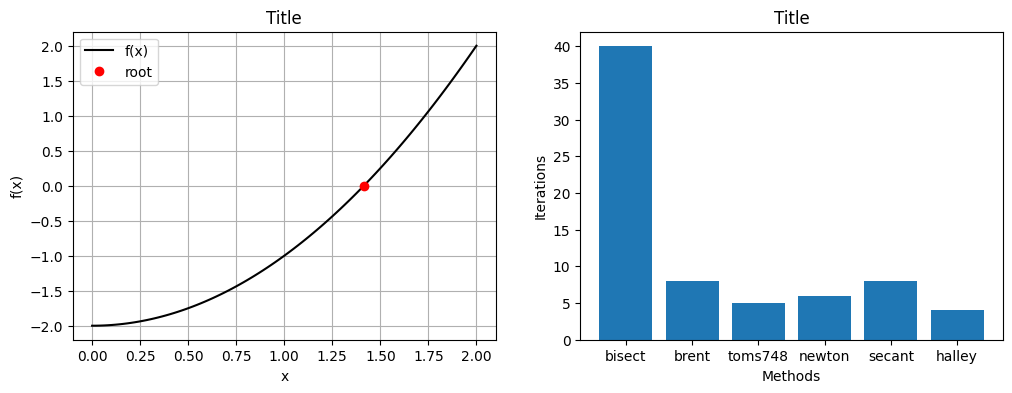

In [105]:
plt.figure(figsize=(12, 4))

# First plot: the function itself
x = np.linspace(a, b, 100)

plt.subplot(1, 2, 1)
plt.plot(x, f(x), color='k')
plt.title('Title')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

plt.plot(root, f(root), 'ro')
plt.legend(['f(x)', 'root'])

# Second plot: the number of iterations
methods = ['bisect', 'brent', 'toms748', 'newton', 'secant', 'halley']
results = [bisectinfo.iterations, brentqinfo.iterations,
           toms748info.iterations, newtoninfo.iterations,
           secantinfo.iterations, halleyinfo.iterations]
plt.subplot(1, 2, 2)
plt.bar(methods, results)
plt.title('Title')
plt.xlabel('Methods')
plt.ylabel('Iterations')


plt.show()

### Limited Iterations Chart

In [106]:
maximum = 4
known = np.sqrt(2)

bisectroot, bisectinfo = scipy.bisect(f, a, b, full_output=True, maxiter=maximum, disp=False)
brentqroot, brentqinfo = scipy.brentq(f, a, b, full_output=True, maxiter=maximum, disp=False)
toms748root, toms748info = scipy.toms748(f, a, b, full_output=True, maxiter=maximum, disp=False)
newtonroot, newtoninfo = scipy.newton(f, x0, fprime=df, full_output=True, maxiter=maximum, disp=False)
secantroot, secantinfo = scipy.newton(f, x0, full_output=True, maxiter=maximum, disp=False)
halleyroot, halleyinfo = scipy.newton(f, x0, fprime=df, fprime2=ddf, full_output=True, maxiter=maximum, disp=False)

print(bisectroot, abs(bisectroot - known), bisectinfo.converged)
print(brentqroot, abs(brentqroot - known), brentqinfo.converged)
print(toms748root, abs(toms748root - known), toms748info.converged)
print(newtonroot, abs(newtonroot - known), newtoninfo.converged)
print(secantroot, abs(secantroot - known), secantinfo.converged)
print(halleyroot, abs(halleyroot - known), halleyinfo.converged)

1.375 0.039213562373095145 False
1.414071510957324 0.00014205141577106062 False
1.4142135623740955 1.000310945187266e-12 False
1.4142342859400734 2.0723566978242403e-05 False
1.4218942521409392 0.007680689767844084 False
1.4142135623730951 0.0 True
